In [1]:
def extract_data(ad, ad_detail):
    try:
        price = ad.select_one("data").get("value").strip()
    except:
        price = None

    try:
        title = ad.select_one("h2").text.strip()
    except:
        title = None
    
    try:
        category = ad.find("span", class_="truncate text-3xs md:text-xs lg:text-xs w-3/5 font-medium text-neutral-500").text.strip()
    except:
        category = None

    try:
        city_time = ad.find("span", class_="line-clamp-1 truncate text-3xs md:text-xs lg:text-xs w-3/5 font-medium text-neutral-500").text.strip()
        city_time=city_time.split(",")
        city = city_time[0].strip()
        time = city_time[1].strip()
    except:
        city = None
        time = None
    
    try:
        description = ad_detail.select_one("p.text-sm.text-start.text-gray-700.font-arabic.whitespace-pre-line.line-clamp-3").text.strip()
    except:
        description = None
    
    try:
        criterias = ad_detail.select_one("ul.grid.gap-3.grid-cols-12")
        criterias = criterias.find_all("li",class_="col-span-6 lg:col-span-3")
        superficie, transType, bains, chambres = None, None, None, None
        for criteria in criterias:
            label = criteria.find("span", class_="text-gray-600/80 text-2xs md:text-xs lg:text-xs font-medium pb-1 truncate").text.strip()
            value = criteria.find("span", class_="text-gray-700/80 text-xs md:text-sm lg:text-sm font-semibold").text.strip()
            if "Superficie" in label:
                superficie = value
            elif "Type de transaction" in label:
                transType = value
            elif "Salles de bains" in label:
                bains = value
            elif "Chambres" in label:
                chambres = value
    except:
        superficie = None
        transType = None
        bains = None
        chambres = None
    
    return {
        "price": price,
        "title": title,
        "category": category,
        "city": city,
        "time": time,
        "description": description,
        "superficie": superficie,
        "transType": transType,
        "bains": bains,
        "chambres": chambres
    }


In [56]:
print("text-gray-700/80 text-xs md:text-sm lg:text-sm font-semibold".replace(" ", "."))
print("col-span-12.pl-4.md:pl-3.pr-6.lg:pl-6.lg:col-[_span_12_/_span_9]".replace(".", " "))

text-gray-700/80.text-xs.md:text-sm.lg:text-sm.font-semibold
col-span-12 pl-4 md:pl-3 pr-6 lg:pl-6 lg:col-[_span_12_/_span_9]


In [3]:
all_ads = []

In [6]:
import requests
from bs4 import BeautifulSoup
import time
import tqdm


headers = {"User-Agent": "Mozilla/5.0"}

for page in tqdm.trange(99,201):  # ✅ 5 pages = ~150 annonces
    print(f"Scraping page {page}...")
    
    base_url = f"https://www.tayara.tn"
    page_suffix = f"/listing/c/Immobilier/?page={page}"
    response = requests.get(base_url + page_suffix, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    
    ads = soup.select("div.pb-2.px-3.z-10.flex-none")  # classes communes
    #print(ads)
    i=0
    
    for ad in tqdm.tqdm(ads):
        # extraction des infos
        #print(f"Scraping ad {i+1}...")
        i+=1
        parent_a = ad.find_parent("a")
        link = parent_a.get("href") if parent_a else None
        link = base_url+link
        response_detail = requests.get(link, headers=headers)
        #print(f"Scraping detail page: {link}")
        #print(f"response_detail.status_code: {response_detail.status_code}, content: {response_detail.content[:100]}")  # Debug line
        soup_detail = BeautifulSoup(response_detail.text, "html.parser")
        #print(f"soup_detail: {soup_detail}")
        ad_detail = soup_detail.find("div",class_="col-span-12")  # classe commune de la page detail0
        #print(f"ad_detail: {ad_detail}")
        all_ads.append(extract_data(ad,ad_detail))
        time.sleep(2)
    
    time.sleep(4)  # ✅ important (anti-blocage)

  0%|          | 0/102 [00:00<?, ?it/s]

Scraping page 99...


  1%|          | 1/102 [01:17<2:09:53, 77.17s/it]

Scraping page 100...


  2%|▏         | 2/102 [02:33<2:07:24, 76.45s/it]

Scraping page 101...


  3%|▎         | 3/102 [03:49<2:06:04, 76.41s/it]

Scraping page 102...


  4%|▍         | 4/102 [05:14<2:10:17, 79.77s/it]

Scraping page 103...


  5%|▍         | 5/102 [06:31<2:07:35, 78.92s/it]

Scraping page 104...


  6%|▌         | 6/102 [07:48<2:05:15, 78.29s/it]

Scraping page 105...


  7%|▋         | 7/102 [09:05<2:03:07, 77.76s/it]

Scraping page 106...


  8%|▊         | 8/102 [10:21<2:00:53, 77.16s/it]

Scraping page 107...


  9%|▉         | 9/102 [11:37<1:59:03, 76.81s/it]

Scraping page 108...


 10%|▉         | 10/102 [13:04<2:02:32, 79.91s/it]

Scraping page 109...


 11%|█         | 11/102 [14:21<1:59:48, 79.00s/it]

Scraping page 110...


 12%|█▏        | 12/102 [15:39<1:58:04, 78.72s/it]

Scraping page 111...


 13%|█▎        | 13/102 [16:55<1:55:32, 77.90s/it]

Scraping page 112...


 14%|█▎        | 14/102 [18:10<1:53:11, 77.18s/it]

Scraping page 113...


 15%|█▍        | 15/102 [19:29<1:52:27, 77.55s/it]

Scraping page 114...


 16%|█▌        | 16/102 [20:45<1:50:37, 77.18s/it]

Scraping page 115...


 17%|█▋        | 17/102 [22:23<1:58:22, 83.56s/it]

Scraping page 116...


 18%|█▊        | 18/102 [23:39<1:53:42, 81.22s/it]

Scraping page 117...


 19%|█▊        | 19/102 [24:55<1:49:53, 79.44s/it]

Scraping page 118...


 20%|█▉        | 20/102 [26:10<1:47:00, 78.30s/it]

Scraping page 119...


 21%|██        | 21/102 [27:27<1:44:55, 77.72s/it]

Scraping page 120...


 22%|██▏       | 22/102 [28:41<1:42:07, 76.60s/it]

Scraping page 121...


 23%|██▎       | 23/102 [29:55<1:39:55, 75.89s/it]

Scraping page 122...


 24%|██▎       | 24/102 [31:12<1:38:59, 76.15s/it]

Scraping page 123...


 25%|██▍       | 25/102 [32:27<1:37:37, 76.08s/it]

Scraping page 124...


 25%|██▌       | 26/102 [33:44<1:36:32, 76.21s/it]

Scraping page 125...


 26%|██▋       | 27/102 [35:02<1:35:54, 76.72s/it]

Scraping page 126...


 27%|██▋       | 28/102 [36:18<1:34:33, 76.67s/it]

Scraping page 127...


 28%|██▊       | 29/102 [37:35<1:33:18, 76.69s/it]

Scraping page 128...


 29%|██▉       | 30/102 [38:52<1:31:56, 76.62s/it]

Scraping page 129...


 30%|███       | 31/102 [40:08<1:30:34, 76.55s/it]

Scraping page 130...


 31%|███▏      | 32/102 [41:24<1:29:09, 76.42s/it]

Scraping page 131...


 32%|███▏      | 33/102 [43:09<1:37:37, 84.89s/it]

Scraping page 132...


 33%|███▎      | 34/102 [44:26<1:33:27, 82.46s/it]

Scraping page 133...


 34%|███▍      | 35/102 [45:41<1:29:45, 80.39s/it]

Scraping page 134...


 35%|███▌      | 36/102 [46:56<1:26:35, 78.72s/it]

Scraping page 135...


 36%|███▋      | 37/102 [48:10<1:23:51, 77.41s/it]

Scraping page 136...


 37%|███▋      | 38/102 [49:27<1:22:28, 77.33s/it]

Scraping page 137...


 38%|███▊      | 39/102 [50:42<1:20:23, 76.56s/it]

Scraping page 138...


 39%|███▉      | 40/102 [51:57<1:18:30, 75.97s/it]

Scraping page 139...


 40%|████      | 41/102 [53:11<1:16:45, 75.50s/it]

Scraping page 140...


 41%|████      | 42/102 [54:26<1:15:10, 75.18s/it]

Scraping page 141...


 42%|████▏     | 43/102 [55:41<1:13:56, 75.20s/it]

Scraping page 142...


 43%|████▎     | 44/102 [56:56<1:12:41, 75.20s/it]

Scraping page 143...


 44%|████▍     | 45/102 [58:10<1:11:06, 74.84s/it]

Scraping page 144...


 45%|████▌     | 46/102 [59:24<1:09:41, 74.67s/it]

Scraping page 145...


 46%|████▌     | 47/102 [1:00:39<1:08:18, 74.52s/it]

Scraping page 146...


 47%|████▋     | 48/102 [1:01:53<1:07:00, 74.46s/it]

Scraping page 147...


 48%|████▊     | 49/102 [1:03:07<1:05:44, 74.43s/it]

Scraping page 148...


 49%|████▉     | 50/102 [1:04:22<1:04:35, 74.53s/it]

Scraping page 149...


 50%|█████     | 51/102 [1:05:37<1:03:24, 74.59s/it]

Scraping page 150...


 51%|█████     | 52/102 [1:06:54<1:02:56, 75.53s/it]

Scraping page 151...


 52%|█████▏    | 53/102 [1:08:09<1:01:24, 75.19s/it]

Scraping page 152...


 53%|█████▎    | 54/102 [1:09:24<1:00:02, 75.06s/it]

Scraping page 153...


 54%|█████▍    | 55/102 [1:10:38<58:45, 75.01s/it]  

Scraping page 154...


 55%|█████▍    | 56/102 [1:12:18<1:03:09, 82.38s/it]

Scraping page 155...


 56%|█████▌    | 57/102 [1:13:35<1:00:35, 80.78s/it]

Scraping page 156...


 57%|█████▋    | 58/102 [1:14:52<58:25, 79.68s/it]  

Scraping page 157...


 58%|█████▊    | 59/102 [1:16:08<56:18, 78.57s/it]

Scraping page 158...


 59%|█████▉    | 60/102 [1:17:22<54:04, 77.25s/it]

Scraping page 159...


 60%|█████▉    | 61/102 [1:18:36<52:06, 76.26s/it]

Scraping page 160...


 61%|██████    | 62/102 [1:19:51<50:31, 75.78s/it]

Scraping page 161...


 62%|██████▏   | 63/102 [1:21:06<49:10, 75.64s/it]

Scraping page 162...


 63%|██████▎   | 64/102 [1:22:23<48:00, 75.82s/it]

Scraping page 163...


 64%|██████▎   | 65/102 [1:23:38<46:46, 75.86s/it]

Scraping page 164...


 65%|██████▍   | 66/102 [1:24:55<45:32, 75.91s/it]

Scraping page 165...


 66%|██████▌   | 67/102 [1:26:11<44:27, 76.22s/it]

Scraping page 166...


 67%|██████▋   | 68/102 [1:27:28<43:10, 76.18s/it]

Scraping page 167...


 68%|██████▊   | 69/102 [1:28:44<41:53, 76.16s/it]

Scraping page 168...


 69%|██████▊   | 70/102 [1:30:00<40:35, 76.10s/it]

Scraping page 169...


 70%|██████▉   | 71/102 [1:31:15<39:10, 75.83s/it]

Scraping page 170...


 71%|███████   | 72/102 [1:32:29<37:41, 75.38s/it]

Scraping page 171...


 72%|███████▏  | 73/102 [1:33:43<36:14, 74.99s/it]

Scraping page 172...


 73%|███████▎  | 74/102 [1:34:57<34:50, 74.68s/it]

Scraping page 173...


 74%|███████▎  | 75/102 [1:36:13<33:45, 75.01s/it]

Scraping page 174...


 75%|███████▍  | 76/102 [1:37:29<32:39, 75.35s/it]

Scraping page 175...


 75%|███████▌  | 77/102 [1:38:45<31:28, 75.55s/it]

Scraping page 176...


 76%|███████▋  | 78/102 [1:40:03<30:29, 76.22s/it]

Scraping page 177...


 77%|███████▋  | 79/102 [1:41:21<29:24, 76.72s/it]

Scraping page 178...


 78%|███████▊  | 80/102 [1:42:36<28:00, 76.41s/it]

Scraping page 179...


 79%|███████▉  | 81/102 [1:43:53<26:47, 76.55s/it]

Scraping page 180...


 80%|████████  | 82/102 [1:45:22<26:44, 80.24s/it]

Scraping page 181...


 81%|████████▏ | 83/102 [1:46:40<25:12, 79.61s/it]

Scraping page 182...


 82%|████████▏ | 84/102 [1:47:57<23:35, 78.65s/it]

Scraping page 183...


 83%|████████▎ | 85/102 [1:49:13<22:05, 77.96s/it]

Scraping page 184...


 84%|████████▍ | 86/102 [1:50:30<20:40, 77.56s/it]

Scraping page 185...


 85%|████████▌ | 87/102 [1:51:47<19:24, 77.63s/it]

Scraping page 186...


 86%|████████▋ | 88/102 [1:53:07<18:15, 78.26s/it]

Scraping page 187...


 87%|████████▋ | 89/102 [1:54:24<16:52, 77.91s/it]

Scraping page 188...


 88%|████████▊ | 90/102 [1:55:42<15:35, 77.93s/it]

Scraping page 189...


 89%|████████▉ | 91/102 [1:57:01<14:19, 78.15s/it]

Scraping page 190...


 90%|█████████ | 92/102 [1:58:17<12:56, 77.67s/it]

Scraping page 191...


 91%|█████████ | 93/102 [1:59:32<11:31, 76.82s/it]

Scraping page 192...


 92%|█████████▏| 94/102 [2:00:49<10:14, 76.85s/it]

Scraping page 193...


 93%|█████████▎| 95/102 [2:02:08<09:02, 77.52s/it]

Scraping page 194...


 94%|█████████▍| 96/102 [2:03:26<07:45, 77.58s/it]

Scraping page 195...


 95%|█████████▌| 97/102 [2:04:44<06:28, 77.63s/it]

Scraping page 196...


 96%|█████████▌| 98/102 [2:06:01<05:09, 77.48s/it]

Scraping page 197...


 97%|█████████▋| 99/102 [2:07:18<03:52, 77.34s/it]

Scraping page 198...


 98%|█████████▊| 100/102 [2:08:33<02:33, 76.71s/it]

Scraping page 199...


 99%|█████████▉| 101/102 [2:09:49<01:16, 76.35s/it]

Scraping page 200...


100%|██████████| 102/102 [2:11:04<00:00, 77.10s/it]


In [45]:
parent_a = ads[0].find_parent("a")
link = parent_a.get("href") if parent_a else None
link

'/item/appartements/monastir/monastir/appartement/69343672cd04d08be7466720/'

In [2]:
print(f"Total ads scraped: {len(all_ads)}")
print(len(ads))

NameError: name 'all_ads' is not defined

In [4]:
import pandas as pd
df = pd.read_csv("tayara_real_estate_raw.csv")
df.shape

(6990, 10)

In [8]:
import pandas as pd

df = pd.DataFrame(all_ads)
print(df.shape)
df


(6990, 10)


,price,title,category,city,time,description,superficie,transType,bains,chambres
0,1340,Appartement S+3 à louer à cité nkhilette,Appartements,Ariana,a few seconds ago,JUST ON TIME IMMO met à votre disposition pour...,136,À Louer,0,3
1,430000,À vendre S+3 haut standing à nasr 2,Appartements,Ariana,a minute ago,JUST ON TIME IMMO met à votre disposition un a...,132,À Vendre,0,3
2,1100,Bureau H+2 à louer à cité el ghazela,Appartements,Ariana,a minute ago,JUST ON TIME IMMO met à votre disposition pour...,120,À Louer,0,2
3,1300,À louer appartement S+3 jamais habité à cité e...,Appartements,Ariana,2 minutes ago,JUST ON TIME IMMO met à votre disposition pour...,140,À Louer,0,3
4,1300,Appartement s+3 à louer à riadh landalous,Appartements,Ariana,2 minutes ago,JUST ON TIME IMMO met à votre disposition un a...,160,À Louer,0,3
...,...,...,...,...,...,...,...,...,...,...
6985,999,🏠𝐄𝐍𝐍𝐀𝐒𝐑 𝟐 ; 𝐚̀ Louer spacieux 𝐚𝐩𝐩𝐭 𝐒+1 bien m...,Appartements,Ariana,18 days ago,🏠𝐄𝐍𝐍𝐀𝐒𝐑 𝟐 ; 𝐚̀ Louer spacieux 𝐚𝐩𝐩𝐭 𝐒+1 bien m...,80,À Louer,1,1
6986,329999,villa a vendre,Maisons et Villas,Nabeul,18 days ago,𝗩𝗶𝗹𝗹𝗮 𝗮̀ 𝘃𝗲𝗻𝗱𝗿𝗲 𝗮̀ 𝗞𝗲́𝗹𝗶𝗯𝗶𝗮 – 𝗢𝗽𝗽𝗼𝗿𝘁𝘂𝗻𝗶𝘁𝗲́ 𝗮̀ ...,200,À Vendre,1,3
6987,599,maison S+2,Maisons et Villas,Tunis,18 days ago,l'agence immobilière GRIRA met à votre disposi...,None,None,1,2
6988,500,a louer S+1,Appartements,Sfax,18 days ago,طريق منزل شاكر كلم 3 زنقة دمق عمارة مسك الليل,70,À Louer,1,1


In [5]:
df["category"].value_counts()

category
Appartements                                 3099
Maisons et Villas                            1299
Terrains et Fermes                           1082
Bureaux et Plateaux                           770
Magasins, Commerces et Locaux industriels     426
Locations de vacances                         186
Autres Immobiliers                             96
Colocations                                    32
Name: count, dtype: int64

In [9]:
df.to_csv("tayara_real_estate_raw.csv", index=False)

# Réduire le travail pour la catégorie appartements et les biens a vendre

In [8]:

df_new = df[
    ((df["category"] == "Appartements")|(df["category"] == "Maisons et Villas")) &
    (df["transType"] == "À Vendre")
]
# suppression des doublons
df_new = df_new.drop_duplicates()
print(df_new.shape)

(1786, 10)


In [9]:
df_new

,price,title,category,city,time,description,superficie,transType,bains,chambres
1,430000.0,À vendre S+3 haut standing à nasr 2,Appartements,Ariana,a minute ago,JUST ON TIME IMMO met à votre disposition un a...,132.0,À Vendre,0,3
10,NaN,Belle maison à la nouvelle médina3 - 94332726,Maisons et Villas,Ben Arous,10 minutes ago,À vendre une villa en R+1 située dans une zone...,500.0,À Vendre,3,4
12,330000.0,À vendre un joli appartement S2 à Chotrana 3,Appartements,Ariana,10 minutes ago,Réf : SVF 981 \n** Soukra Négoce vous propose ...,90.0,À Vendre,1,2
16,210000.0,𝐀̀ 𝐕𝐞𝐧𝐝𝐫𝐞 – 𝐄́𝐭𝐚𝐠𝐞 𝐝𝐞 𝐕𝐢𝐥𝐥𝐚 𝐒+𝟐 / 22009303,Maisons et Villas,Nabeul,15 minutes ago,𝐀̀ 𝐕𝐞𝐧𝐝𝐫𝐞 – 𝐄́𝐭𝐚𝐠𝐞 𝐝𝐞 𝐕𝐢𝐥𝐥𝐚 𝐒+𝟐\n 𝐃𝐚𝐫 𝐂𝐡𝐚𝐚̂𝐛𝐚𝐧...,160.0,À Vendre,1,2
18,315000.0,A vendre un appartement en s0 au lac 2,Appartements,tunis,22 minutes ago,Century 21 Barros lac 2 vous propose pour la v...,41.0,À Vendre,1,1
...,...,...,...,...,...,...,...,...,...,...
6965,430000.0,A Vendre Villa à Manzel Abderahmen Bizerte,Maisons et Villas,tunis,18 days ago,Votre Agence Immobilière SAIEK et Belhaouane V...,329.0,À Vendre,0,5
6967,179998.0,appartement vue sur le fort de kélibia,Appartements,Nabeul,18 days ago,🏡 Appartement Haut Standing à Vendre – Jinen E...,100.0,À Vendre,1,2
6969,220000.0,برطمان طابق ارضي مع مدخل سيارة للبيع,Maisons et Villas,Nabeul,18 days ago,"appartement rdc – 𝑱𝒊𝒏𝒆𝒏 𝑴𝒂𝒏𝒔𝒐𝒖𝒓𝒂, 𝑲𝒆́𝒍𝒊𝒃𝒊𝒂\n...",110.0,À Vendre,1,2
6972,470000.0,À Vendre : Appartement S+3 Haut Standing – Bi...,Appartements,Bizerte,18 days ago,VA001212 – À Vendre : Appartement S+3 Haut St...,316.0,À Vendre,2,3


In [10]:
df_new.to_csv("immobilier_vendre.csv", index=False)

In [14]:
df_new

,price,title,category,city,time,description,superficie,transType,bains,chambres
1,4.300000e+05,À vendre S+3 haut standing à nasr 2,Appartements,Ariana,a minute ago,JUST ON TIME IMMO met à votre disposition un a...,132.0,À Vendre,0,3
10,1.000935e+07,Belle maison à la nouvelle médina3 - 94332726,Maisons et Villas,Ben Arous,10 minutes ago,À vendre une villa en R+1 située dans une zone...,500.0,À Vendre,3,4
12,3.300000e+05,À vendre un joli appartement S2 à Chotrana 3,Appartements,Ariana,10 minutes ago,Réf : SVF 981 \n** Soukra Négoce vous propose ...,90.0,À Vendre,1,2
16,2.100000e+05,𝐀̀ 𝐕𝐞𝐧𝐝𝐫𝐞 – 𝐄́𝐭𝐚𝐠𝐞 𝐝𝐞 𝐕𝐢𝐥𝐥𝐚 𝐒+𝟐 / 22009303,Maisons et Villas,Nabeul,15 minutes ago,𝐀̀ 𝐕𝐞𝐧𝐝𝐫𝐞 – 𝐄́𝐭𝐚𝐠𝐞 𝐝𝐞 𝐕𝐢𝐥𝐥𝐚 𝐒+𝟐\n 𝐃𝐚𝐫 𝐂𝐡𝐚𝐚̂𝐛𝐚𝐧...,160.0,À Vendre,1,2
18,3.150000e+05,A vendre un appartement en s0 au lac 2,Appartements,tunis,22 minutes ago,Century 21 Barros lac 2 vous propose pour la v...,41.0,À Vendre,1,1
...,...,...,...,...,...,...,...,...,...,...
6965,4.300000e+05,A Vendre Villa à Manzel Abderahmen Bizerte,Maisons et Villas,tunis,18 days ago,Votre Agence Immobilière SAIEK et Belhaouane V...,329.0,À Vendre,0,5
6967,1.799980e+05,appartement vue sur le fort de kélibia,Appartements,Nabeul,18 days ago,🏡 Appartement Haut Standing à Vendre – Jinen E...,100.0,À Vendre,1,2
6969,2.200000e+05,برطمان طابق ارضي مع مدخل سيارة للبيع,Maisons et Villas,Nabeul,18 days ago,"appartement rdc – 𝑱𝒊𝒏𝒆𝒏 𝑴𝒂𝒏𝒔𝒐𝒖𝒓𝒂, 𝑲𝒆́𝒍𝒊𝒃𝒊𝒂\n...",110.0,À Vendre,1,2
6972,4.700000e+05,À Vendre : Appartement S+3 Haut Standing – Bi...,Appartements,Bizerte,18 days ago,VA001212 – À Vendre : Appartement S+3 Haut St...,316.0,À Vendre,2,3


In [12]:
# Remplir les NaN de la colonne 'price' par la moyenne (calculée sans les NaN)
mean_price = df_new["price"].mean()
print("Moyenne des prix (excluant NaN) :", mean_price)

n_before = df_new["price"].isna().sum()
df_new["price"] = df_new["price"].fillna(mean_price)
n_after = df_new["price"].isna().sum()

print(f"NaN price avant: {n_before} -> après: {n_after}")

Moyenne des prix (excluant NaN) : 10009347.723525641
NaN price avant: 226 -> après: 0


In [13]:
df_new

,price,title,category,city,time,description,superficie,transType,bains,chambres
1,4.300000e+05,À vendre S+3 haut standing à nasr 2,Appartements,Ariana,a minute ago,JUST ON TIME IMMO met à votre disposition un a...,132.0,À Vendre,0,3
10,1.000935e+07,Belle maison à la nouvelle médina3 - 94332726,Maisons et Villas,Ben Arous,10 minutes ago,À vendre une villa en R+1 située dans une zone...,500.0,À Vendre,3,4
12,3.300000e+05,À vendre un joli appartement S2 à Chotrana 3,Appartements,Ariana,10 minutes ago,Réf : SVF 981 \n** Soukra Négoce vous propose ...,90.0,À Vendre,1,2
16,2.100000e+05,𝐀̀ 𝐕𝐞𝐧𝐝𝐫𝐞 – 𝐄́𝐭𝐚𝐠𝐞 𝐝𝐞 𝐕𝐢𝐥𝐥𝐚 𝐒+𝟐 / 22009303,Maisons et Villas,Nabeul,15 minutes ago,𝐀̀ 𝐕𝐞𝐧𝐝𝐫𝐞 – 𝐄́𝐭𝐚𝐠𝐞 𝐝𝐞 𝐕𝐢𝐥𝐥𝐚 𝐒+𝟐\n 𝐃𝐚𝐫 𝐂𝐡𝐚𝐚̂𝐛𝐚𝐧...,160.0,À Vendre,1,2
18,3.150000e+05,A vendre un appartement en s0 au lac 2,Appartements,tunis,22 minutes ago,Century 21 Barros lac 2 vous propose pour la v...,41.0,À Vendre,1,1
...,...,...,...,...,...,...,...,...,...,...
6965,4.300000e+05,A Vendre Villa à Manzel Abderahmen Bizerte,Maisons et Villas,tunis,18 days ago,Votre Agence Immobilière SAIEK et Belhaouane V...,329.0,À Vendre,0,5
6967,1.799980e+05,appartement vue sur le fort de kélibia,Appartements,Nabeul,18 days ago,🏡 Appartement Haut Standing à Vendre – Jinen E...,100.0,À Vendre,1,2
6969,2.200000e+05,برطمان طابق ارضي مع مدخل سيارة للبيع,Maisons et Villas,Nabeul,18 days ago,"appartement rdc – 𝑱𝒊𝒏𝒆𝒏 𝑴𝒂𝒏𝒔𝒐𝒖𝒓𝒂, 𝑲𝒆́𝒍𝒊𝒃𝒊𝒂\n...",110.0,À Vendre,1,2
6972,4.700000e+05,À Vendre : Appartement S+3 Haut Standing – Bi...,Appartements,Bizerte,18 days ago,VA001212 – À Vendre : Appartement S+3 Haut St...,316.0,À Vendre,2,3


In [15]:
df_new.isna().sum()

price           0
title           0
category        0
city            0
time            0
description     2
superficie     77
transType       0
bains          63
chambres       62
dtype: int64

In [17]:
# Supprimer les lignes où 'superficie' est NaN
before = df_new.shape[0]
df_new.dropna(subset=["superficie"], inplace=True)
after = df_new.shape[0]
print(f"Lignes supprimées: {before - after}  |  Nouvelle shape: {df_new.shape}")
df_new.isna().sum()

Lignes supprimées: 77  |  Nouvelle shape: (1709, 10)


price           0
title           0
category        0
city            0
time            0
description     1
superficie      0
transType       0
bains          38
chambres       36
dtype: int64

In [18]:
df_new.dropna(subset=["bains","chambres"], inplace=True)

In [19]:
df_new.isna().sum()

price          0
title          0
category       0
city           0
time           0
description    1
superficie     0
transType      0
bains          0
chambres       0
dtype: int64

In [20]:
df_new

,price,title,category,city,time,description,superficie,transType,bains,chambres
1,4.300000e+05,À vendre S+3 haut standing à nasr 2,Appartements,Ariana,a minute ago,JUST ON TIME IMMO met à votre disposition un a...,132.0,À Vendre,0,3
10,1.000935e+07,Belle maison à la nouvelle médina3 - 94332726,Maisons et Villas,Ben Arous,10 minutes ago,À vendre une villa en R+1 située dans une zone...,500.0,À Vendre,3,4
12,3.300000e+05,À vendre un joli appartement S2 à Chotrana 3,Appartements,Ariana,10 minutes ago,Réf : SVF 981 \n** Soukra Négoce vous propose ...,90.0,À Vendre,1,2
16,2.100000e+05,𝐀̀ 𝐕𝐞𝐧𝐝𝐫𝐞 – 𝐄́𝐭𝐚𝐠𝐞 𝐝𝐞 𝐕𝐢𝐥𝐥𝐚 𝐒+𝟐 / 22009303,Maisons et Villas,Nabeul,15 minutes ago,𝐀̀ 𝐕𝐞𝐧𝐝𝐫𝐞 – 𝐄́𝐭𝐚𝐠𝐞 𝐝𝐞 𝐕𝐢𝐥𝐥𝐚 𝐒+𝟐\n 𝐃𝐚𝐫 𝐂𝐡𝐚𝐚̂𝐛𝐚𝐧...,160.0,À Vendre,1,2
18,3.150000e+05,A vendre un appartement en s0 au lac 2,Appartements,tunis,22 minutes ago,Century 21 Barros lac 2 vous propose pour la v...,41.0,À Vendre,1,1
...,...,...,...,...,...,...,...,...,...,...
6965,4.300000e+05,A Vendre Villa à Manzel Abderahmen Bizerte,Maisons et Villas,tunis,18 days ago,Votre Agence Immobilière SAIEK et Belhaouane V...,329.0,À Vendre,0,5
6967,1.799980e+05,appartement vue sur le fort de kélibia,Appartements,Nabeul,18 days ago,🏡 Appartement Haut Standing à Vendre – Jinen E...,100.0,À Vendre,1,2
6969,2.200000e+05,برطمان طابق ارضي مع مدخل سيارة للبيع,Maisons et Villas,Nabeul,18 days ago,"appartement rdc – 𝑱𝒊𝒏𝒆𝒏 𝑴𝒂𝒏𝒔𝒐𝒖𝒓𝒂, 𝑲𝒆́𝒍𝒊𝒃𝒊𝒂\n...",110.0,À Vendre,1,2
6972,4.700000e+05,À Vendre : Appartement S+3 Haut Standing – Bi...,Appartements,Bizerte,18 days ago,VA001212 – À Vendre : Appartement S+3 Haut St...,316.0,À Vendre,2,3


In [21]:
df_new.drop(["transType", "time", "description", "title"], axis=1, inplace=True)

In [22]:
df_new

,price,category,city,superficie,bains,chambres
1,4.300000e+05,Appartements,Ariana,132.0,0,3
10,1.000935e+07,Maisons et Villas,Ben Arous,500.0,3,4
12,3.300000e+05,Appartements,Ariana,90.0,1,2
16,2.100000e+05,Maisons et Villas,Nabeul,160.0,1,2
18,3.150000e+05,Appartements,tunis,41.0,1,1
...,...,...,...,...,...,...
6965,4.300000e+05,Maisons et Villas,tunis,329.0,0,5
6967,1.799980e+05,Appartements,Nabeul,100.0,1,2
6969,2.200000e+05,Maisons et Villas,Nabeul,110.0,1,2
6972,4.700000e+05,Appartements,Bizerte,316.0,2,3


In [26]:
df_new.drop(["category", "city"], axis=1, inplace=True)

In [27]:
df_new

,price,superficie,bains,chambres
1,4.300000e+05,132.0,0,3
10,1.000935e+07,500.0,3,4
12,3.300000e+05,90.0,1,2
16,2.100000e+05,160.0,1,2
18,3.150000e+05,41.0,1,1
...,...,...,...,...
6965,4.300000e+05,329.0,0,5
6967,1.799980e+05,100.0,1,2
6969,2.200000e+05,110.0,1,2
6972,4.700000e+05,316.0,2,3


In [25]:
counts = df_new["city"].value_counts()
counts

city
Nabeul         347
Tunis          310
Ariana         241
Sousse         196
Ben Arous      169
tunis          148
Monastir        45
Mahdia          45
Sfax            43
Bizerte         42
Médenine        24
La Manouba      23
ariana          10
Kairouan         3
Siliana          3
nabeul           3
sousse           2
Kasserine        2
Le Kef           1
Gabès            1
Béja             1
la-manouba       1
Sidi Bouzid      1
ben-arous        1
Jendouba         1
Zaghouan         1
Name: count, dtype: int64

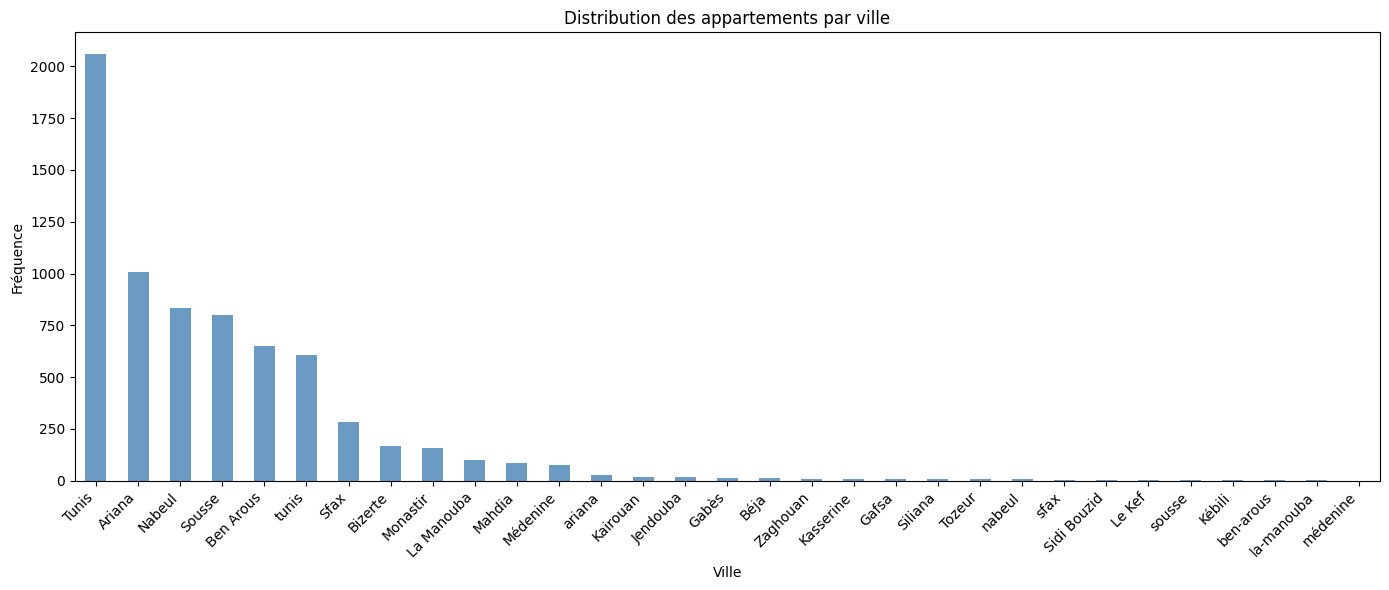

In [94]:
import matplotlib.pyplot as plt
# Bar plot du nombre d'annonces par ville
plt.figure(figsize=(14, 6))
df['city'].value_counts().plot(kind='bar', color='steelblue', alpha=0.8)
plt.xlabel('Ville')
plt.ylabel('Fréquence')
plt.title('Distribution des appartements par ville')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
df_model = df_new.copy()
df_model.to_csv("immobilier_vendre_cleaned.csv", index=False)

In [33]:
df_new["superficie"] = pd.to_numeric(df_new["superficie"], errors='coerce').astype('Float64')
df_new["price"] = pd.to_numeric(df_new["price"], errors='coerce').astype('Float64')
df_new["bains"] = pd.to_numeric(df_new["bains"], errors='coerce').astype('Int64')
df_new["chambres"] = pd.to_numeric(df_new["chambres"], errors='coerce').astype('Int64')

In [34]:
df_new.dtypes

price         Float64
superficie    Float64
bains           Int64
chambres        Int64
dtype: object

In [49]:
df_model.isna().sum()

price         0
superficie    0
bains         1
chambres      0
dtype: int64

In [50]:
df_model.dropna(subset=["bains"], inplace=True)
df_model.isna().sum()

price         0
superficie    0
bains         0
chambres      0
dtype: int64

In [ ]:
df_okprice = df_new[df_new[
    (df_new["price"] > 50_000) &
    (df_new["price"] < 2_000_000)
]]

In [75]:
df_oksuper = df_okprice.copy()

In [76]:
df_oksuper = df_oksuper[(df_oksuper["superficie"] > 20) & (df_oksuper["superficie"] < 600)]

In [78]:
df_oksuper.shape

(1228, 4)

In [68]:
df_okprice.shape

(1294, 4)

In [65]:
df_model = df_okprice.copy()

In [79]:
df_model = df_oksuper.copy()

In [97]:
df_model.to_csv("immobilier_vendre_cleaned3.csv", index=False)

In [48]:
df_model = df_new.copy()
df_model.to_csv("immobilier_vendre_cleaned2.csv", index=False)

# Model generation

In [80]:
X = df_model.drop("price", axis=1)
y = df_model["price"]

In [81]:
X.dropna(subset=["bains"], inplace=True)
X.isna().sum()

superficie    0
bains         0
chambres      0
dtype: int64

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 🔵 Régression Linéaire (AVEC normalisation)

In [84]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

# 🟠 Random Forest (SANS normalisation requise)

In [85]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)  # données non normalisées

RandomForestRegressor(n_estimators=300, random_state=42)

In [96]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression
y_pred_lin = lin_reg.predict(X_test_scaled)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

# Random Forest
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression \n→ RMSE:", rmse_lin, "\nR²:", r2_lin)
print("Random Forest \n→ RMSE:", rmse_rf, "\nR²:", r2_rf)

Linear Regression 
→ RMSE: 201383.64357560145 
R²: 0.5194142795368133
Random Forest 
→ RMSE: 185629.57597555587 
R²: 0.5916647998106037


In [73]:
print(df_model["price"].describe())
print("descending:\n",df_model["price"].sort_values(ascending=False).head(20))
print("ascending:\n",df_model["price"].sort_values().head(20))

count           1294.0
mean     409470.958269
std      304417.533974
min            65000.0
25%           220000.0
50%           315000.0
75%           489999.5
max          1990000.0
Name: price, dtype: Float64
descending:
 3002    1990000.0
2029    1990000.0
5637    1980000.0
2997    1900000.0
2479    1900000.0
2170    1900000.0
5783    1900000.0
6547    1850000.0
2511    1800000.0
1871    1700000.0
2592    1700000.0
5104    1650000.0
2042    1600000.0
5475    1600000.0
861     1600000.0
5501    1560000.0
5353    1500000.0
6439    1500000.0
3688    1500000.0
6346    1480000.0
Name: price, dtype: Float64
ascending:
 720     65000.0
6855    65000.0
744     70000.0
3723    70000.0
5859    75000.0
1867    80000.0
5302    80000.0
3510    80000.0
844     80000.0
5152    80000.0
2305    85000.0
1333    85000.0
1197    85000.0
1774    85000.0
278     86000.0
2671    89000.0
1418    90000.0
2953    90000.0
3765    92000.0
5629    92000.0
Name: price, dtype: Float64


In [72]:
print(df_model["superficie"].describe())
print("descending:\n",df_model["superficie"].sort_values(ascending=False).head(20))
print("ascending:\n",df_model["superficie"].sort_values().head(20))

count          1294.0
mean       520.692164
std      11394.451765
min            -102.0
25%              93.0
50%             122.0
75%             227.0
max          410000.0
Name: superficie, dtype: Float64
descending:
 2501    410000.0
5477      2900.0
5655      2707.0
158       2583.0
5071      2500.0
6934      2000.0
6428      1600.0
5783      1500.0
442       1490.0
2796      1250.0
5353      1220.0
676       1125.0
6495      1090.0
3444      1085.0
6709      1053.0
2926      1012.0
2145      1000.0
1898      1000.0
1454      1000.0
446        970.0
Name: superficie, dtype: Float64
ascending:
 5821   -102.0
5616      0.0
2434      0.0
2308      0.0
2933      0.0
5805      0.0
893       1.0
2275      1.0
5433      2.0
5697      3.0
2269     32.0
3280     35.0
6385     40.0
793      40.0
18       41.0
2106     42.0
1119     43.0
1418     45.0
1610     45.0
6069     45.0
Name: superficie, dtype: Float64


# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [56]:
print(df_new.columns)

Index(['price', 'superficie', 'bains', 'chambres'], dtype='object')


In [57]:
import numpy as np

df_new = df_new.replace({None: np.nan})
print(df_new.isna().sum())

price         0
superficie    0
bains         1
chambres      0
dtype: int64


In [58]:
ads = soup.select("div.pb-2.px-3.z-10.flex-none")
print(len(ads))

NameError: name 'soup' is not defined

In [ ]:
df_new_backup = df_new.copy()

In [ ]:
df_new.dropna(subset=["price"], inplace=True)
df_new.shape

(683, 10)

In [ ]:
df_new["category"].value_counts()

category
Appartements    683
Name: count, dtype: int64

In [ ]:
df_new.shape

(717, 10)

In [ ]:
df_new[df_new.isna().any(axis=1)]

,price,title,category,city,time,description,superficie,transType,bains,chambres
407,215000,"À VENDRE : Des appartements S+1, S+2 et S+3 si...",Appartements,tunis,20 hours ago,"🏡 À VENDRE – Appartements S+1, S+2 & S+3 – Rem...",NaN,À Vendre,NaN,NaN
503,310000,À Vendre 1ER ETAGE – S+3 +cellier+place parkin...,Appartements,tunis,a day ago,"À Vendre – Appartement S+3 à Laouina, Cité Les...",135,À Vendre,NaN,NaN
972,900,7 Porte d'intérieur neuves,Appartements,Tunis,2 days ago,A vendre 7 portes neuves :\n3 portes 80 sur 2m...,NaN,À Vendre,NaN,NaN
1400,218000,"À VENDRE : Des appartements S+1, S+2 & S+3 , (...",Appartements,Tunis,2 days ago,🏡 REO Immobilier vous propose à la vente des a...,NaN,À Vendre,NaN,NaN
1695,150000,🏢 À VENDRE | Appartement S+3 à Ariana – Route ...,Appartements,Ariana,3 days ago,SOF-4575\n🏢 À VENDRE | Appartement S+3 à Arian...,NaN,À Vendre,2,3
1702,195000,Appartement à vendre,Appartements,tunis,3 days ago,À vendre un appartement à bab souika près de t...,NaN,À Vendre,1,4
1949,145000,"(S +0) avec meubles à Chatt Mariem, Prés de l...",Appartements,Sousse,3 days ago,✅Appartement (S+0) avec meubles à Chatt Marie...,35,À Vendre,1,NaN
2112,337000,"À VENDRE : Un superbe appartement S+3, idéalem...",Appartements,Tunis,4 days ago,🏡 REO Immobilier vous propose à la vente un su...,NaN,À Vendre,1,3
2244,160000,A vendre S+1 a Ennkhilet,Appartements,tunis,4 days ago,L' agence Bestimmo vous propose à la vente un...,NaN,À Vendre,1,2
2335,135000,À vendre – Appartement S+1 à l’Avenue de Tunis...,Appartements,Ben Arous,4 days ago,À vendre – Appartement S+1 à l’Avenue de Tunis...,NaN,À Vendre,1,0


In [ ]:
import re

def extract_price_from_text(text):
    if not isinstance(text, str):
        return None
    
    pattern = r"(\d[\d\s\.]{0,15})\s*(k|m|md|dt|mdt|mt|dinar|dinars|dinar tunisien|dinars tunisiens|د|م|مليون|ألف دينار)"  # Added 'm' and 'md' for million and thousand
    
    match = re.search(pattern, text, flags=re.IGNORECASE)
    
    if match:
        number = match.group(1)
        number = number.replace(" ", "").replace(".", "")
        
        try:
            return float(number)
        except:
            return None
    
    return None

In [ ]:
df_new[df_new["price"].isna()]

,price,title,category,city,time,description,superficie,transType,bains,chambres
69,NaN,MENZAH 7 BIS : APPARTEMENT S+3 À VENDRE,Appartements,Ariana,44 minutes ago,📍MENZAH 7 BIS : APPARTEMENT S+3 À VENDRE \n\n...,190,À Vendre,3,4
203,NaN,🔑 🏡VENTE SUR PLAN : R+4 haut standing à Sahlou...,Appartements,Sousse,12 hours ago,🔑 🏡VENTE SUR PLAN : R+4 haut standing à Sahlou...,67.5,À Vendre,1,1
208,NaN,"Un bel appartement s+1 de 67,5 m² et 32m² Terr...",Appartements,Sousse,12 hours ago,"Un bel appartement s+1 de 67,5 m² et 32m² Terr...",67.5,À Vendre,1,1
219,NaN,#𝐀𝐩𝐩𝐚𝐫𝐭𝐞𝐦𝐞𝐧𝐭 𝐒0 en #vente à 𝐑é𝐬𝐢𝐝𝐞𝐧𝐜𝐞 𝐀𝐪𝐮𝐚 𝐑𝐞𝐬...,Appartements,Sousse,13 hours ago,#𝐀𝐩𝐩𝐚𝐫𝐭𝐞𝐦𝐞𝐧𝐭 𝐒0 en #vente à 𝐑é𝐬𝐢𝐝𝐞𝐧𝐜𝐞 𝐀𝐪𝐮𝐚 𝐑𝐞𝐬...,45,À Vendre,1,1
225,NaN,"VENTE DES APPARTEMENTS S1,S2 ET S3 SUR PLAN A ...",Appartements,Sousse,13 hours ago,"Nouveau projet, Résidence R+6 à 📍Sahloul 3\n👉O...",89,À Vendre,2,2
...,...,...,...,...,...,...,...,...,...,...
4321,NaN,A vendre appartement S+2 HST à kélibia,Appartements,Nabeul,11 days ago,A vendre appartement S+2 à kélibia \nVue sur m...,97,À Vendre,1,2
4370,NaN,Appartement S2 à Vendre à Sousse,Appartements,Sousse,11 days ago,A vendre à Sousse un S+2 cosy avec fort potent...,77,À Vendre,1,2
4371,NaN,À VENDRE APPARTEMENT S+2 À KÉLIBIA,Appartements,Nabeul,11 days ago,🌟 À VENDRE - APPARTEMENT S+2 À KÉLIBIA 🌟\n📍Emp...,120,À Vendre,1,2
4379,NaN,À Vendre Appartement S+4 Pied dans L’eauet vue...,Appartements,Mahdia,11 days ago,‼️𝑵𝙊𝑼𝙑𝑬𝘼𝑼𝙏𝑬́‼️\n 𝓼+4 𝓿𝓊𝓮 𝓼𝓊𝓻 𝓶ℯ𝓻 ...,287,À Vendre,4,4


In [ ]:
nan_prices = df_new[df_new["price"].isna()]
titles = nan_prices["title"].tolist()
descriptions = nan_prices["description"].tolist()
for title, description in zip(titles, descriptions):
    combined_text = f"{title} {description}"
    extracted_price = extract_price_from_text(combined_text)
    print(f"Title: {title}\n Description: {description}\n Extracted Price: {extracted_price}\n")

Title: MENZAH 7 BIS :  APPARTEMENT S+3 À VENDRE
 Description: 📍MENZAH 7 BIS :  APPARTEMENT S+3 À VENDRE 

L’agence #MON_RÉSEAU met à la vente un appartement s+3 de 190  m2  au 6 éme étage avec double ascenseurs dans une résidence sécurisée , situé à proximité de toutes commodités. 

Il se compose d’:

-Un salon spacieux avec balcon
- Séjour 
- Une cuisine équipée avec séchoir 
- Deux chambres coucher avec placards
-Une suite parentale avec salle de bain et balai 
- Une salle de bain 
- Une salle d’eau
- Climatisation 
- Chauffage central  
- Place de parking sous sol 
- Gardiennage et syndic 

🚨 CONTRAT DE VENTE

Prix de vente : 395 MD 

Pour de plus amples informations veuillez contacter nos conseillères en immobilier : 

☎️Téléphone  : Afficher le numéro
                          : Afficher le numéro
 Extracted Price: 190.0

Title: 🔑 🏡VENTE SUR PLAN : R+4 haut standing à Sahloul 4 Sousse Tunisia !
 Description: 🔑 🏡VENTE SUR PLAN : R+4 haut standing à Sahloul 4 Sousse Tunisia !
🏠Say 

In [ ]:
nan_prices = df_new[df_new["price"].isna()]
nan_prices["extracted_price"] = nan_prices[["title","description"]].apply(lambda x: extract_price_from_text(" ".join(x)), axis=1)
nan_prices.isna().sum()
#print(nan_prices[nan_prices["extracted_price"].isna()==False]["description"][2777])
#print(nan_prices[nan_prices["extracted_price"].isna()==False])
ady = nan_prices[(nan_prices["extracted_price"].isna()==False)]
ext = nan_prices[(nan_prices["extracted_price"].isna()==False) & (nan_prices["extracted_price"]>40)]
int = nan_prices[(nan_prices["extracted_price"].isna()==False) & (nan_prices["extracted_price"]<=40)]
mask = ~nan_prices.isin(ady)
beki = nan_prices[mask.all(axis=1)]
print(ext.shape)
print(int.shape)
beki.shape

(42, 11)
(12, 11)


C:\Users\DELL\AppData\Local\Temp\ipykernel_2072\3896883302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_prices["extracted_price"] = nan_prices[["title","description"]].apply(lambda x: extract_price_from_text(" ".join(x)), axis=1)


(22, 11)

In [ ]:
nan_prices.isna().sum()

price              76
title               0
category            0
city                0
time                0
description         0
superficie          5
transType           0
bains               3
chambres            3
extracted_price    22
dtype: int64

In [ ]:
ext["extracted_price"] = ext["extracted_price"]*1000
ext["extracted_price"][3333] = 158350
ext

C:\Users\DELL\AppData\Local\Temp\ipykernel_2072\136705767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ext["extracted_price"] = ext["extracted_price"]*1000
C:\Users\DELL\AppData\Local\Temp\ipykernel_2072\136705767.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc

,price,title,category,city,time,description,superficie,transType,bains,chambres,extracted_price
69,NaN,MENZAH 7 BIS : APPARTEMENT S+3 À VENDRE,Appartements,Ariana,44 minutes ago,📍MENZAH 7 BIS : APPARTEMENT S+3 À VENDRE \n\n...,190,À Vendre,3,4,190000.0
259,NaN,À vendre S+2 à Chotrana 1,Appartements,Ariana,15 hours ago,À vendre S+2 de HS à la Soukra (Chotrana1)\n\n...,127,À Vendre,2,2,127000.0
353,NaN,Offre top appartement au coeur zone touristiqu...,Appartements,Nabeul,18 hours ago,𝐎𝐟𝐟𝐫𝐞 𝐟𝐢𝐧 𝐝'𝐚𝐧𝐧𝐞́𝐞 𝐕𝐢𝐬𝐢𝐭𝐞 𝐆𝐫𝐚𝐭𝐮𝐢𝐭e\n فرصة ذهب...,80,À Vendre,2,2,80000.0
384,NaN,🔥 À vendre : Appartement S+2,Appartements,Nabeul,19 hours ago,🔥 À vendre : Appartement S+2\n🌊 Vue sur la mer...,110,À Vendre,1,2,100000.0
389,NaN,Appartement S+2 Haut Standing AFH Borj Cédria,Appartements,Ben Arous,19 hours ago,"un excellent appartement S+2 de 103 m², situé ...",103,À Vendre,1,2,103000.0
514,NaN,A VENDRE un appartement S+2 à HERGLA,Appartements,Sousse,a day ago,🏖️A vendre\n Un bel appartement S+2 situé au 1...,115,À Vendre,1,2,115000.0
637,NaN,تقاسيم مسجلة بدفدر الخانة للبيع من 200 م الى م...,Appartements,Kairouan,a day ago,تقاسيم مسجلة بدفدر الخانة للبيع من 200 الى 400...,200,À Vendre,0,0,200000.0
714,NaN,Appartement à Vendre à Sfax,Appartements,Sfax,2 days ago,A VENDRE : Spacieux appartement de 149 m² (S+4...,149,À Vendre,1,4,149000.0
857,NaN,Appartement S+2 à vendre à Hammamet Mrezga,Appartements,Nabeul,2 days ago,"🌅 Appartement S+2 sur plan – Hammamet Mrezga, ...",99,À Vendre,2,2,99000.0
887,NaN,🏡 À Vendre | Appartement S+2 – 1er Étage | Cit...,Appartements,Ariana,2 days ago,🏡 À Vendre | Appartement S+2 – 1er Étage | Cit...,90,À Vendre,1,2,90000.0


In [ ]:
titles = beki["title"].tolist()
descriptions = beki["description"].tolist()
for title, description in zip(titles, descriptions):
    combined_text = f"{title} {description}"
    extracted_price = extract_price_from_text(combined_text)
    print(f"Title: {title}\n Description: {description}\n Extracted Price: {extracted_price}\n")

Title: 🔑 🏡VENTE SUR PLAN : R+4 haut standing à Sahloul 4 Sousse Tunisia !
 Description: 🔑 🏡VENTE SUR PLAN : R+4 haut standing à Sahloul 4 Sousse Tunisia !
🏠Say ALLO IMMO vous propose à la vente des appartements S1, S2 et S3 de haut standing dans un nouveau projet R+4 «𝐋𝐚 𝐑𝐞𝐢𝐧𝐞 », idéalement situé dans un quartier résidentiel calme à Sahloul 4
🏗️ Livraison prévue : Mars 2026📅
Facilités de paiement disponibles
💎 Prestations haut de gamme :
• Grès 1er choix
• Chauffage et climatisation
• Boiserie de qualité, cuisines & dressings agencés
• Robinetterie de luxe, vidéophone
• Résidence clôturée, sécurisée, avec digicode, concierge & syndic
🔑 Réservez dès maintenant votre futur appartement !➡️ Vente sur plan avec facilité de paiement.
📲 Pour plus d’infos ou pour réserver :☎️𝟱𝟮 𝟮𝟭 𝟮𝟭 𝟱𝟵📧 [email protected]
🌐sayalloimmo.com
#sayalloimmo #sahloul4 #immobilier #appartementneuf #hautstanding #Investissement #RésidenceSécurisée
 Extracted Price: None

Title: #𝐀𝐩𝐩𝐚𝐫𝐭𝐞𝐦𝐞𝐧𝐭 𝐒0 en #vente à 𝐑é𝐬𝐢𝐝𝐞𝐧𝐜𝐞 𝐀𝐪𝐮

In [ ]:
df_new["price"] = df_new["price"].fillna(ext["extracted_price"])

In [ ]:
ext.shape   

(42, 11)

In [ ]:
df_new.isna().sum()

price          0
title          0
category       0
city           0
time           0
description    0
superficie     0
transType      0
bains          0
chambres       0
dtype: int64

In [ ]:
df_new.dropna(subset=["price"], inplace=True)
df_new

,price,title,category,city,time,description,superficie,transType,bains,chambres
6,240000,appartement à vendre,Appartements,Sousse,a few seconds ago,REMAX masters vous propose un appartement S+2 ...,94,À Vendre,2,2
10,330000,DEUX APPTS S+2 A DAR FADHAL,Appartements,tunis,5 minutes ago,A vendre deux Appartements S+2 au RDC et au 1e...,230,À Vendre,2,4
24,390000,APPT S+2 PRES L'EGLISE L'AOUINA,Appartements,Tunis,24 minutes ago,A vendre un spacieux appartement S+2 HTS au cœ...,120,À Vendre,2,2
43,370000,ENNASR 2: APPARTEMENT S+2 À VENDRE,Appartements,Ariana,32 minutes ago,📍ENNASR 2: APPARTEMENT S+2 À VENDRE \n\nL’agen...,130,À Vendre,2,2
45,195000,MENZAH 7 BIS: APPARTEMENT S+1 À VENDRE,Appartements,Ariana,34 minutes ago,📍MENZAH 7 BIS: APPARTEMENT S+1 À VENDRE \n\nL’...,1,À Vendre,1,1
...,...,...,...,...,...,...,...,...,...,...
4417,350000,A Vendre Appartement S+2 Haut Standing à AFH M...,Appartements,tunis,11 days ago,L’agence immobilière Le Boulevard vous propose...,91,À Vendre,1,2
4420,210000,S+1 de très haut standing à Vendre au RDC dans...,Appartements,Nabeul,11 days ago,City Casa vous propose \nS+1 de très haut stan...,53.5,À Vendre,1,-1
4432,440000,S+2 de Luxe Vue piscine dans une résidence ave...,Appartements,Nabeul,11 days ago,Remise des clés 2026 \n\nS+2 de Luxe Vue pisci...,426,À Vendre,1,2
4434,340000,🏡 À vendre – Bel appartement S+3 à Menzah 7,Appartements,Ariana,11 days ago,IB-4625\n🏡 À vendre – Bel appartement S+3 à Me...,136,À Vendre,2,3


# Superficie nan

In [ ]:
import re

def extract_superficie_smart(text):
    if not isinstance(text, str):
        return None
    
    pattern = r"(\d[\d\s\.]*)(\s*(m2|m²|m|metre|metres|mètres|carre|carré|carres|carrés|superficie|surface))"
    
    match = re.search(pattern, text, flags=re.IGNORECASE)
    
    if not match:
        return None
    
    number = match.group(1)

    # Nettoyer le nombre : enlever espaces et points
    number = number.replace(" ", "").replace(".", "")
    
    if not number.isdigit():
        return None
    
    return float(number)


In [ ]:
missing_surface = df_new[df_new["superficie"].isna()]
print(missing_surface.isna().sum())
missing_surface["superficie"] = missing_surface[["title","description"]].apply(lambda x: extract_superficie_smart(" ".join(x)), axis=1)
sup_nan = missing_surface[missing_surface["superficie"].isna()==True]
titles = sup_nan["title"].tolist()
descriptions = sup_nan["description"].tolist()
for title, description in zip(titles, descriptions):
    combined_text = f"{title} {description}"
    extracted_surface = extract_superficie_smart(combined_text)
    print(f"Title: {title}\n Description: {description}\n Extracted Surface: {extracted_surface}\n --------------------------------")

price           0
title           0
category        0
city            0
time            0
description     0
superficie     18
transType       0
bains           6
chambres        7
dtype: int64
Title: À VENDRE : Des appartements S+1, S+2 et S+3 situés à La Nouvelle Soukra ( Direct promoteur )
 Description: 🏡 À VENDRE – Appartements S+1, S+2 & S+3 – Remise des clés T3 2026 ! (Direct Promoteur) 🏡

✨ Ce que nous proposons :
✅ Appartements S+1, S+2 et S+3
✅ Résidence moderne et élégante
✅ Finitions haut de gamme
✅ Espaces bien agencés
✅ Architecture contemporaine
✅ Environnement calme et agréable

📍 Emplacement privilégié : La Nouvelle Soukra
🗓️ Remise des clés : 3ème trimestre 2026

💰 Prix attractifs :
✅ S+1 : à partir de 215 000 DT
✅ S+2 : à partir de 333 000 DT
✅ S+3 : à partir de 391 000 DT

🚶‍♂️ À proximité de toutes les commodités : commerces, écoles, transports…

📞 Intéressé(e) ? Contactez-nous pour plus d'infos ou une visite :
📱 Afficher le numéro  | Afficher le numéro | Afficher le

C:\Users\DELL\AppData\Local\Temp\ipykernel_2072\2329914581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_surface["superficie"] = missing_surface[["title","description"]].apply(lambda x: extract_superficie_smart(" ".join(x)), axis=1)


In [ ]:
imp_surf = missing_surface.dropna(subset=["superficie"])
imp_surf.isna().sum()

price          0
title          0
category       0
city           0
time           0
description    0
superficie     0
transType      0
bains          4
chambres       5
dtype: int64

In [ ]:
df_new["superficie"] = df_new["superficie"].fillna(imp_surf["superficie"])
df_new = df_new.dropna(subset=["superficie"])

In [ ]:
df_new = df_new.drop(index=972)

In [ ]:
df_new["bains"] = df_new["bains"].fillna(1)

In [ ]:
bain_chmbr = df_new[df_new["chambres"].isna().any(axis=1)]

In [ ]:
bain_chmbr

,price,title,category,city,time,description,superficie,transType,bains,chambres
503,310000,À Vendre 1ER ETAGE – S+3 +cellier+place parkin...,Appartements,tunis,a day ago,"À Vendre – Appartement S+3 à Laouina, Cité Les...",135,À Vendre,1,NaN
1400,218000,"À VENDRE : Des appartements S+1, S+2 & S+3 , (...",Appartements,Tunis,2 days ago,🏡 REO Immobilier vous propose à la vente des a...,30.0,À Vendre,1,NaN
1949,145000,"(S +0) avec meubles à Chatt Mariem, Prés de l...",Appartements,Sousse,3 days ago,✅Appartement (S+0) avec meubles à Chatt Marie...,35,À Vendre,1,NaN
2644,79000.0,A vendre des s+1 et s+2 neufs à yasminette,Appartements,tunis,5 days ago,À Vendre | Appartements Neufs Haut Standing – ...,79.0,À Vendre,1,NaN
3039,175000,À VENDRE APPARTEMENT S+4 100 m² Rue Chadli K...,Appartements,Tunis,6 days ago,APPARTEMENT À VENDRE S+4\nRue Chadli Kallella...,100,À Vendre,1,NaN
3340,300500,S+1 de Luxe avec jardin dans une résidence ave...,Appartements,Nabeul,7 days ago,Remise des clés 2026 \n\nS+1 de Luxe avec jard...,70.0,À Vendre,1,NaN
4318,150000,À vendre – Appartement 85 m² à El Wardia 4,Appartements,Tunis,11 days ago,"Bel appartement de 85 m² situé à El Wardia 4, ...",85.0,À Vendre,1,NaN


In [ ]:
df_new["superficie"] = df_new["superficie"].fillna(imp_surf["superficie"])

In [ ]:
# Get indices of NaN rows
nan_indices = df_new[df_new["chambres"].isna()].index
chambs = [3, 6, 0, 3, 4, 1, 2]

# Fill each row individually
for i, idx in enumerate(nan_indices):
    if i < len(chambs):
        df_new.loc[idx, "chambres"] = chambs[i]

# drop les colonne inutiles: description et titre

In [ ]:
df_new = df_new.drop(["description","title"], axis=1)

In [ ]:
df_new

,price,category,city,time,superficie,transType,bains,chambres
6,240000,Appartements,Sousse,a few seconds ago,94,À Vendre,2,2
10,330000,Appartements,tunis,5 minutes ago,230,À Vendre,2,4
24,390000,Appartements,Tunis,24 minutes ago,120,À Vendre,2,2
43,370000,Appartements,Ariana,32 minutes ago,130,À Vendre,2,2
45,195000,Appartements,Ariana,34 minutes ago,1,À Vendre,1,1
...,...,...,...,...,...,...,...,...
4413,500000,Appartements,Nabeul,11 days ago,110,À Vendre,2,2
4417,350000,Appartements,tunis,11 days ago,91,À Vendre,1,2
4420,210000,Appartements,Nabeul,11 days ago,53.5,À Vendre,1,-1
4432,440000,Appartements,Nabeul,11 days ago,426,À Vendre,1,2


# drop category et transtype == meme valeurs pour tous

In [ ]:
#df_new = df_new.drop(["category", "transType"], axis=1)
#df_new = df_new.drop(["time"], axis=1)
df_new.dtypes
df_final = df_new.copy()

In [ ]:
df_final["price"] = (
    df_final["price"].astype(str)
                      .str.replace(r"[^\d\.]", "", regex=True)
                      .astype(float)
)


In [ ]:
df_final["superficie"] = (
    df_final["superficie"].astype(str)
                           .str.replace(r"[^\d\.]", "", regex=True)
                           .astype(float)
)


In [ ]:
df_final["bains"] = pd.to_numeric(df_final["bains"], errors='coerce').astype('Int64')
df_final["chambres"] = pd.to_numeric(df_final["chambres"], errors='coerce').astype('Int64')

In [ ]:
df_final["city"] = df_final["city"].astype("category")

In [ ]:
df_final.dtypes

price          float64
city          category
superficie     float64
bains            Int64
chambres         Int64
dtype: object

In [ ]:
df_final

,price,city,superficie,bains,chambres
6,240000.0,Sousse,94.0,2,2
10,330000.0,tunis,230.0,2,4
24,390000.0,Tunis,120.0,2,2
43,370000.0,Ariana,130.0,2,2
45,195000.0,Ariana,1.0,1,1
...,...,...,...,...,...
4413,500000.0,Nabeul,110.0,2,2
4417,350000.0,tunis,91.0,1,2
4420,210000.0,Nabeul,53.5,1,-1
4432,440000.0,Nabeul,426.0,1,2


# Model generation

### city variable encoding

In [ ]:
df_model = pd.get_dummies(df_final, columns=["city"], drop_first=True)

In [ ]:
df_model.columns

Index(['price', 'superficie', 'bains', 'chambres', 'city_ben arous',
       'city_bizerte', 'city_gabes', 'city_kairouan', 'city_mahdia',
       'city_manouba', 'city_medenine', 'city_monastir', 'city_nabeul',
       'city_sfax', 'city_sousse', 'city_tunis'],
      dtype='object')

In [ ]:
import unicodedata
import re

def normalize_city(city):
    if not isinstance(city, str):
        return city
    
    # minuscules
    city = city.lower()
    
    # supprimer accents
    city = unicodedata.normalize("NFKD", city)
    city = city.encode("ascii", "ignore").decode("utf-8")
    
    # supprimer les déterminants au début
    city = re.sub(r"^(la |el |al )\s+", "", city)
    
    # supprimer tirets et espaces inutiles
    city = city.replace("-", " ").strip()
    
    return city


In [ ]:
df_final["city"] = df_final["city"].apply(normalize_city)

In [ ]:
df_final["city"] = df_final["city"].replace({
    "la manouba": "manouba"
})

In [ ]:
df_final["city"].value_counts()


city
tunis        183
nabeul       147
ariana       122
sousse       106
ben arous     43
monastir      31
mahdia        21
bizerte        7
manouba        6
sfax           5
gabes          1
kairouan       1
medenine       1
Name: count, dtype: int64

# Split data

In [ ]:
from sklearn.model_selection import train_test_split

X = df_model.drop("price", axis=1)
y = df_model["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 🔵 1) Régression Linéaire

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

## 🟠 2) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# Random Forest
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("=== LINEAR REGRESSION ===")
print("MSE :", mse_lin)
print("RMSE :", rmse_lin)
print("R² :", r2_lin)

print("\n=== RANDOM FOREST ===")
print("MSE :", mse_rf)
print("RMSE :", rmse_rf)
print("R² :", r2_rf)


=== LINEAR REGRESSION ===
MSE : 20605398740.775658
RMSE : 143545.807116668
R² : 0.39281414182224794

=== RANDOM FOREST ===
MSE : 22271500762.01182
RMSE : 149236.39221721966
R² : 0.3437185820467381


# --------------------- ------------------------------------------------------------

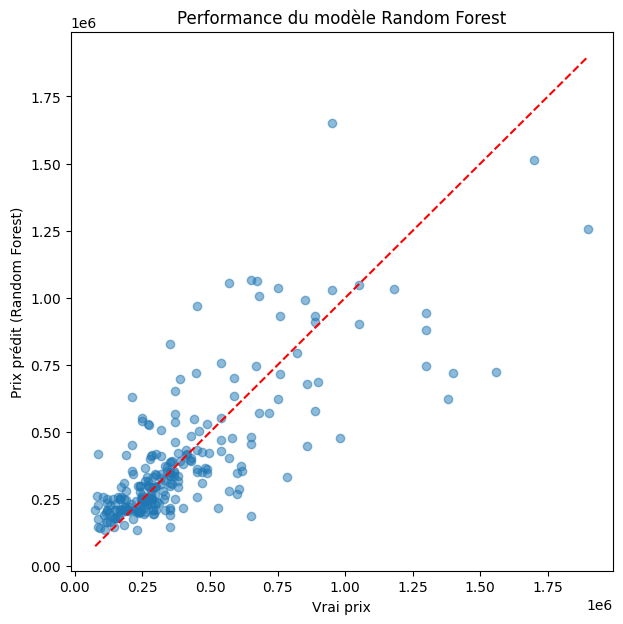

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Vrai prix")
plt.ylabel("Prix prédit (Random Forest)")
plt.title("Performance du modèle Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()


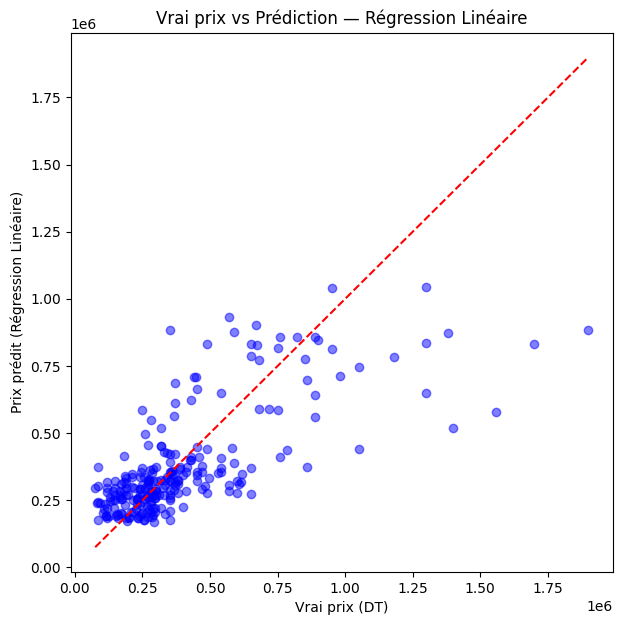

In [88]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_lin, alpha=0.5, color='blue')
plt.xlabel("Vrai prix (DT)")
plt.ylabel("Prix prédit (Régression Linéaire)")
plt.title("Vrai prix vs Prédiction — Régression Linéaire")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--")  # Ligne parfaite
plt.show()


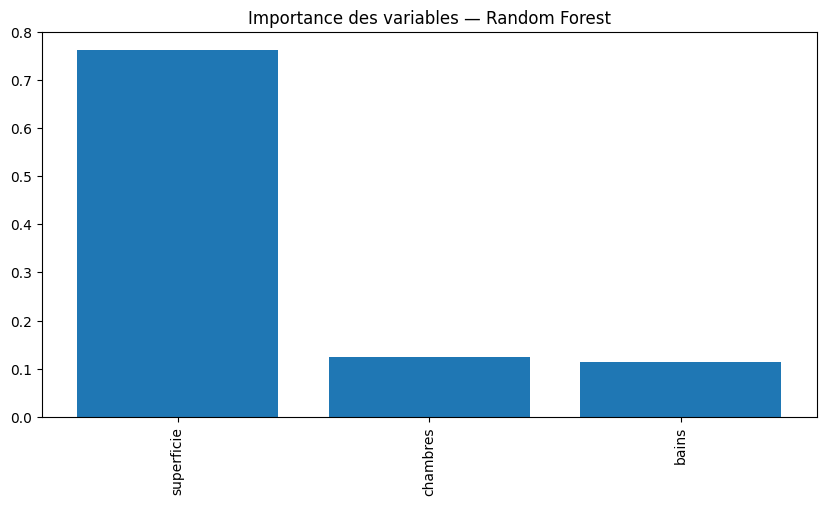

In [89]:
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Importance des variables — Random Forest")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

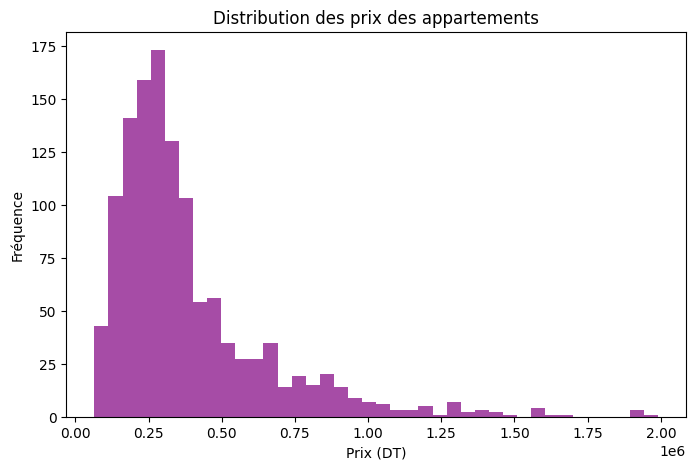

In [90]:
plt.figure(figsize=(8,5))
plt.hist(df_model["price"], bins=40, color='purple', alpha=0.7)
plt.xlabel("Prix (DT)")
plt.ylabel("Fréquence")
plt.title("Distribution des prix des appartements")
plt.show()


# Deploiment

In [91]:
X.columns

Index(['superficie', 'bains', 'chambres'], dtype='object')

In [92]:
import joblib

joblib.dump(rf, "model_RF.pkl")
joblib.dump(list(X.columns), "features.pkl")

['features.pkl']

In [ ]:
X

,superficie,bains,chambres,city_ben arous,city_bizerte,city_gabes,city_kairouan,city_mahdia,city_manouba,city_medenine,city_monastir,city_nabeul,city_sfax,city_sousse,city_tunis
6,94.0,2,2,False,False,False,False,False,False,False,False,False,False,True,False
10,230.0,2,4,False,False,False,False,False,False,False,False,False,False,False,True
24,120.0,2,2,False,False,False,False,False,False,False,False,False,False,False,True
43,130.0,2,2,False,False,False,False,False,False,False,False,False,False,False,False
45,1.0,1,1,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4413,110.0,2,2,False,False,False,False,False,False,False,False,True,False,False,False
4417,91.0,1,2,False,False,False,False,False,False,False,False,False,False,False,True
4420,53.5,1,-1,False,False,False,False,False,False,False,False,True,False,False,False
4432,426.0,1,2,False,False,False,False,False,False,False,False,True,False,False,False
